In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<module 'biophysnn' from '/gpfs/commons/home/daknowles/pooledRBPs/biophysical_cnn/biophysnn.py'>

In [2]:
dat_file = "/gpfs/commons/home/mschertzer/asb_model/220708_all_ipsc_ip/enrichment_values/all_data_gencode_v41_300w_100s.txt.gz"
dat = pd.read_csv(dat_file, sep = "\t")
dat.rename(columns={"X1":"chrom","X2":"start","X3":"end","X4":"gene","X6":"strand"}, inplace=True)
dat

In [49]:
dat_all = dat[(dat["input-rep1"] > 15) & (dat["input-rep2"] > 15)].copy()

In [50]:
dat_all["hnrnpk_enrich_1"] = dat["hnrnpk-rep1"] / dat["input-rep1"]
dat_all["hnrnpk_enrich_2"] = dat["hnrnpk-rep2"] / dat["input-rep2"]
dat_all["hnrnpa1_enrich"] = dat["hnrnpa1-rep1"] / dat["input-rep1"]
dat_all["rbfox2_enrich"] = dat["rbfox2-rep2"] / dat["input-rep2"]

,hnrnpk_enrich_1,hnrnpk_enrich_2,hnrnpa1_enrich,rbfox2_enrich
285,0.231263,0.184605,0.525696,1.140900
287,0.210360,0.149679,0.586398,1.075298
289,0.217143,0.142785,0.641758,1.086781
291,0.229665,0.135550,0.702153,1.010230
293,0.257956,0.130952,0.768007,0.952381
...,...,...,...,...
13800279,6.835875,5.030714,0.371650,0.248589
13800280,6.591213,5.024080,0.316584,0.231095
13800281,6.532429,5.050203,0.269373,0.224935
13800282,4.777837,4.605217,0.238679,0.215829


In [54]:
cor_mat = np.corrcoef(dat_all.iloc[:,-4:].to_numpy().transpose())

<AxesSubplot:>

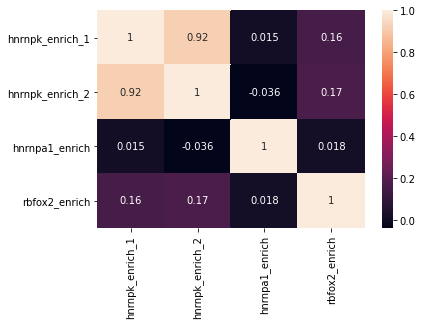

In [56]:
sns.heatmap(dat_all.iloc[:,-4:].corr(), annot=True)